In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load datasets
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

# Drop irrelevant columns
matches.drop(["umpire3"], axis=1, inplace=True)

# Fill missing values
matches.fillna({"city": "Unknown", "winner": "No Result"}, inplace=True)

# Convert date column to DateTime format
matches["date"] = pd.to_datetime(matches["date"])

# Save cleaned data
matches.to_csv("cleaned_matches.csv", index=False)
deliveries.to_csv("cleaned_deliveries.csv", index=False)

print("✅ Data Cleaning Completed!")


C:\Users\syeda\AppData\Local\Temp\ipykernel_4040\3071970625.py:14: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  matches["date"] = pd.to_datetime(matches["date"])


✅ Data Cleaning Completed!


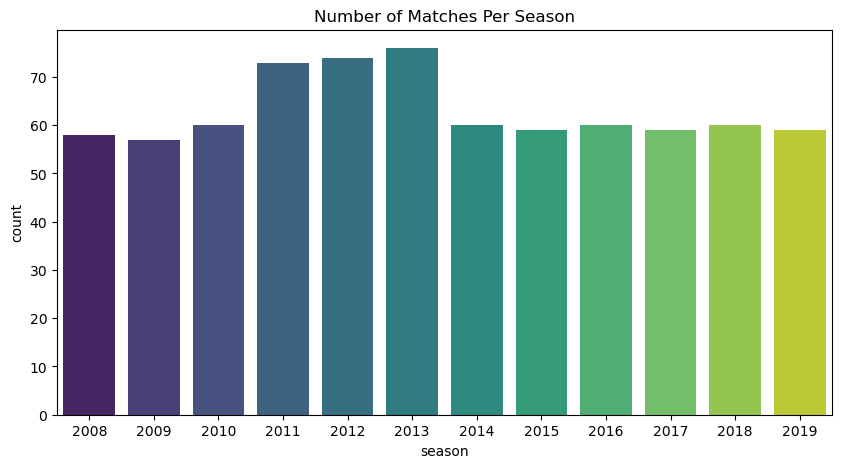

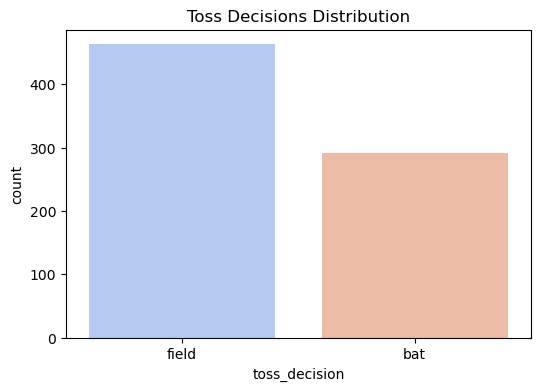

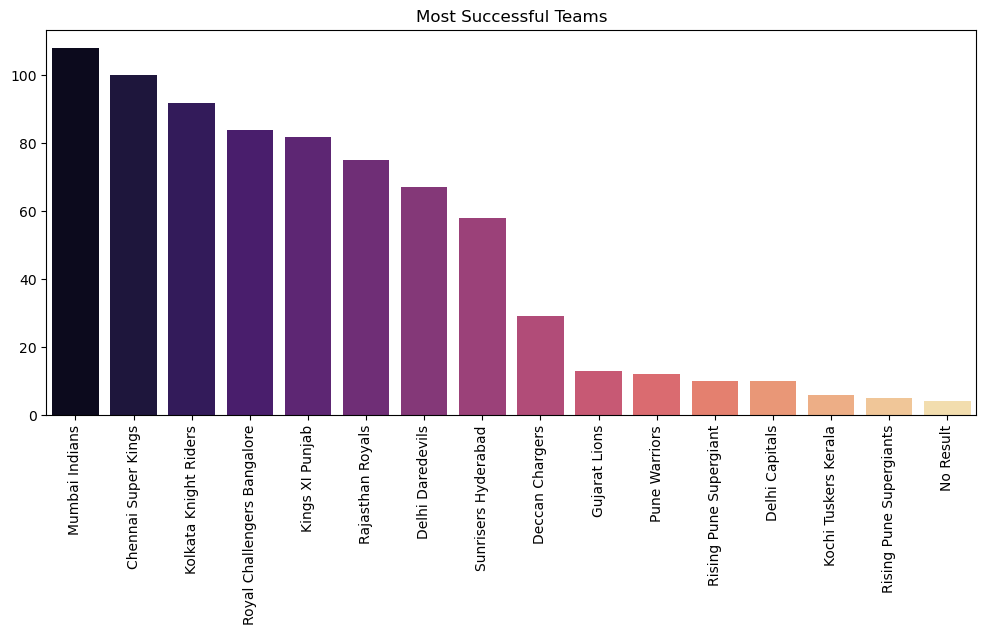

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
matches = pd.read_csv("cleaned_matches.csv")

# Matches per season
plt.figure(figsize=(10, 5))
sns.countplot(x="season", data=matches, palette="viridis")
plt.title("Number of Matches Per Season")
plt.show()

# Toss Decision Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x="toss_decision", data=matches, palette="coolwarm")
plt.title("Toss Decisions Distribution")
plt.show()

# Most successful teams
team_wins = matches["winner"].value_counts()
plt.figure(figsize=(12, 5))
sns.barplot(x=team_wins.index, y=team_wins.values, palette="magma")
plt.xticks(rotation=90)
plt.title("Most Successful Teams")
plt.show()


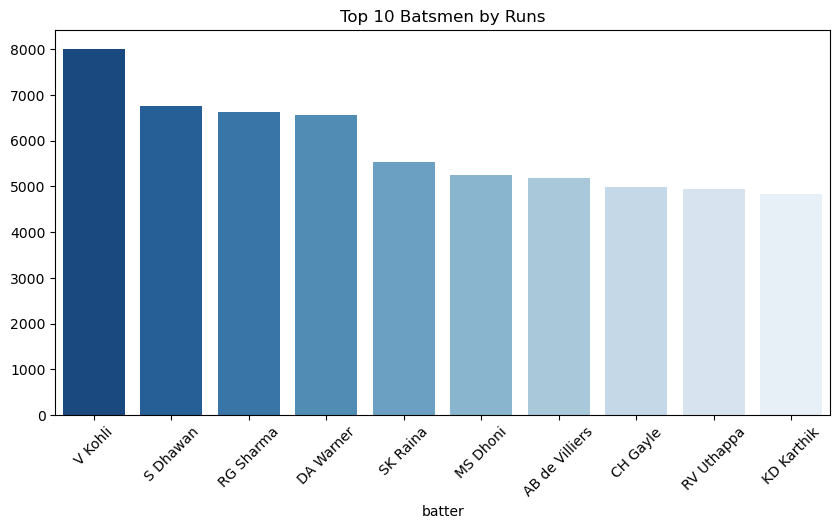

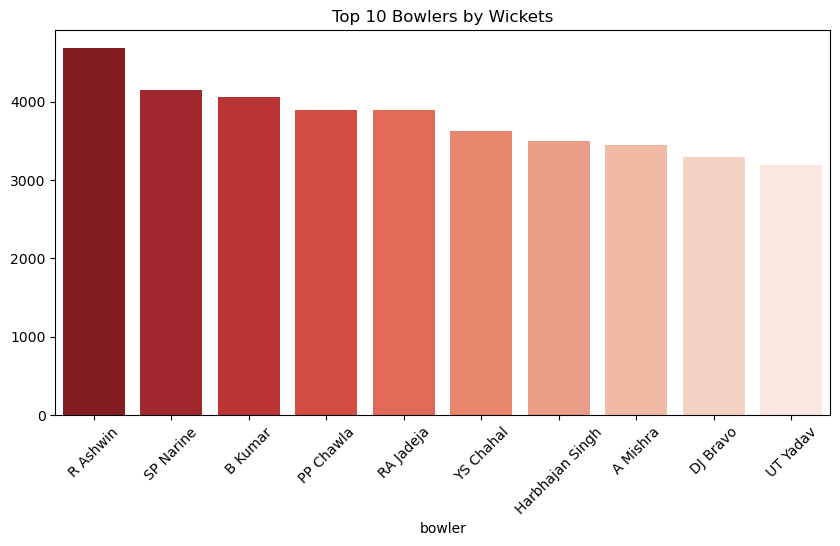

In [6]:
# Load deliveries data
deliveries = pd.read_csv("cleaned_deliveries.csv")

# Top Run Scorers
top_batsmen = deliveries.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_batsmen.index, y=top_batsmen.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Top 10 Batsmen by Runs")
plt.show()

# Top Bowlers
top_bowlers = deliveries.groupby("bowler")["total_runs"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_bowlers.index, y=top_bowlers.values, palette="Reds_r")
plt.xticks(rotation=45)
plt.title("Top 10 Bowlers by Wickets")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Encode categorical variables
matches["team1"] = matches["team1"].astype("category").cat.codes
matches["team2"] = matches["team2"].astype("category").cat.codes
matches["toss_winner"] = matches["toss_winner"].astype("category").cat.codes
matches["winner"] = matches["winner"].astype("category").cat.codes

# Features and Target
X = matches[["team1", "team2", "toss_winner"]]
y = matches["winner"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Model Accuracy: {accuracy:.2f}")


✅ Model Accuracy: 0.54


In [9]:
print(dir())  # This will list all available variables

['In', 'Out', 'RandomForestClassifier', 'X', 'X_test', 'X_train', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_exit_code', '_i', '_i1', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'accuracy', 'accuracy_score', 'deliveries', 'exit', 'get_ipython', 'matches', 'model', 'open', 'pd', 'plt', 'quit', 'sns', 'team_wins', 'top_batsmen', 'top_bowlers', 'train_test_split', 'y', 'y_pred', 'y_test', 'y_train']


In [11]:
import pandas as pd

# Load the dataset again if necessary
matches = pd.read_csv("matches.csv")  # Adjust file path if needed
deliveries = pd.read_csv("deliveries.csv")

# Save the cleaned DataFrames
matches.to_csv("cleaned_matches.csv", index=False)
deliveries.to_csv("cleaned_deliveries.csv", index=False)

print("Files saved successfully!")


Files saved successfully!
